
# PYTHON-12. Feature engineering 

## Как всё устроено в Юните 3?

Для успешного выполнения практического задания вам понадобятся знания по следующим темам: 

- ML-1. Теория машинного обучения
- ML-2. Предобработка данных
- MATHSTAT-1. Линейная алгебра. Часть I
- *MATHSTAT-2. Линейная алгебра. Часть II (дополнительный модуль)

### Понятия: 
 - вектор
 - базис
 - оператор
 - матрица 
 - линейная алгебра
 - векторные записи
 - проблема больших данных
 - сжатие данных с помощью линейной алгеброй 
 - изучение машинного обучения + линейная алгебра
 

### Чего достигнем



- задачи решаемые ML и их основные этапы 
- закрепление EDA - работа с пропусками, feature engineering, визуализация
- изучение основных инструментов линейной алгебры
- различное использование матриц для решения задач

## 12.1 Пропущенные значения

 #### Задание 1
1/1 point (graded)
Посчитайте количество пропусков в столбце time. Метод isna() есть не только у DataFrame, но и у Series. Это значит, что применять его можно не только ко всей таблице, но и к каждому столбцу отдельно.

In [1]:
import pandas as pd


log = pd.read_csv("./datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,NaN
996,#error,NaN,10054.0,29265.0
997,#error,NaN,10454.0,NaN
998,#error,NaN,1000.0,NaN


In [2]:
len(log[log.time.isna()])

15

Сделаем бекап датасета 

log_original = log.copy()

#### Задание 2
Удалите все столбцы, где есть пропуски. Запишите в поле, сколько осталось столбцов в данных после этого.
Используйте оригинальный датасет log.csv.


In [3]:
log.dropna(axis=1)

,user_id
0,Запись пользователя № - user_919
1,Запись пользователя № - user_973
2,Запись пользователя № - user_903
3,Запись пользователя № - user_954
4,Запись пользователя № - user_954
...,...
995,Запись пользователя № - user_984
996,#error
997,#error
998,#error


#### Задание 3

Удалите все строки, где есть пропуски. Запишите в поле, сколько осталось строк в данных после этого.

Используйте оригинальный датасет log.csv.


In [4]:
log = pd.read_csv("./datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']

log.dropna(axis=0)

,user_id,time,bet,win
14,Запись пользователя № - user_917,[2019-01-02 8:57:36,145732.0,1987653.0
29,Запись пользователя № - user_942,[2019-01-04 13:59:42,1678321.0,9876543.0
151,Запись пользователя № - user_982,[2019-01-16 21:54:22,100.0,4749.0
189,Запись пользователя № - user_964,[2019-01-21 18:34:44,200.0,4667.0
205,Запись пользователя № - user_931,[2019-01-22 5:26:59,300.0,4319.0
...,...,...,...,...
967,Запись пользователя № - user_975,[2019-04-19 22:25:15,1000.0,6108.0
971,Запись пользователя № - user_912,[2019-04-20 10:35:49,10554.0,31799.0
972,Запись пользователя № - user_926,[2019-04-20 10:35:50,10354.0,30244.0
976,Запись пользователя № - user_970,[2019-04-20 10:35:54,10354.0,30691.0


#### Задание 4 
1 point possible (graded)
Используйте оригинальный датасет log.csv.

С данными в столбцах bet и win мы разберемся позже: пропуски в этих столбцах требуют особого подхода.

А сейчас:

если есть пропуски в столбце user_id - удалите столбец user_id,

если есть пропуски в столбце time - удалите столбец time.

Запишите в поле ответа, количество оставшихся столбцов в данных, после этих действий.

In [5]:
log = pd.read_csv('./datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,NaN
996,#error,NaN,10054.0,29265.0
997,#error,NaN,10454.0,NaN
998,#error,NaN,1000.0,NaN


In [6]:
log.user_id.isna().any()
log.time.isna().any()

True

In [7]:
log = log.drop(['time'], axis=1)
log

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN
...,...,...,...
995,Запись пользователя № - user_984,9754.0,NaN
996,#error,10054.0,29265.0
997,#error,10454.0,NaN
998,#error,1000.0,NaN


In [8]:
## 12.2. Дубли

#### Задание 1
1 point possible (graded)
Удалите дубли среди столбцов user_id и time. Запишите в поле ниже, сколько осталось строк после удаления дублей.

Используйте оригинальный датасет log.csv.

In [9]:
log = pd.read_csv('./datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.drop_duplicates(subset=['user_id', 'time'])

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
991,Запись пользователя № - user_965,[2019-04-20 12:55:41,800.0,6927.0
992,Запись пользователя № - user_967,[2019-04-20 14:59:36,10154.0,NaN
993,Запись пользователя № - user_973,[2019-04-20 17:09:56,10254.0,NaN
994,Запись пользователя № - user_977,[2019-04-20 18:10:07,10354.0,NaN


In [10]:
# 12.3 Преобразование к datetime

#### Задание 1

1 point possible (graded)

Уберите лишний символ, преобразуйте признак time к datetime. После этого найдите наибольшую дату и выведите ее без времени.

Подсказка: можно применить метод max() к получившемуся столбцу со временем.

Не забудьте избавиться от пропусков.

Запишите ответ в формате "YYYY-MM-DD".

In [11]:
log = pd.read_csv('./datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna()
log.drop_duplicates(subset=['user_id', 'time'])

log['time'] = pd.to_datetime(log.time.str.strip('['))
max_date = log.time.max()

display(max_date, log)
max_date.strftime('%Y-%m-%d')

Timestamp('2019-04-20 18:10:07')

,user_id,time,bet,win
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,NaN
996,#error,NaT,10054.0,29265.0
997,#error,NaT,10454.0,NaN
998,#error,NaT,1000.0,NaN


'2019-04-20'

Для задания ниже:

Посмотрите на код:

In [12]:
log = pd.read_csv("datasets/python-12/log.csv")
log = log.dropna()
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = log['time'].apply(lambda x: x[1:])
log['time'] = pd.to_datetime(log['time'])
# Пропущенная строка
# log['time'] = log['time'].apply(lambda x: x.minute)
log.time = log.time.apply(lambda x: x.minute)

log['time'].head()

13     57
28     59
150    54
188    34
204    26
Name: time, dtype: int64

И на изображение:

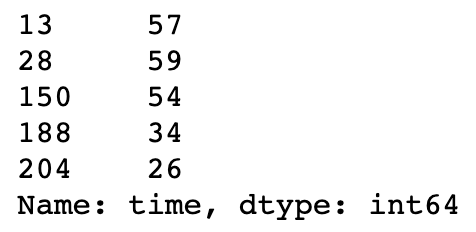
    
Теперь ответьте на вопрос ниже.

In [13]:
log['time'] = log['time'].apply(lambda x: x.minute)

AttributeError: 'int' object has no attribute 'minute'

## 12.4 Извлечение признаков времени

### Задание 1
1 point possible (graded)
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите минуту, которая встречалась в данных чаще всего. Введите ответ в поле ниже.

In [ ]:
log = pd.read_csv("datasets/python-12/log.csv")
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = log['time'].str.strip('[')
log['time'] = pd.to_datetime(log['time'])

log['time'] = log['time'].dt.minute
log['time'].value_counts().head()

### Задание 2

1 point possible (graded)
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите месяц, который встречался в данных реже всего. Введите ответ в поле ниже.

In [14]:
log = pd.read_csv("datasets/python-12/log.csv")
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = log['time'].str.strip('[')
log['time'] = pd.to_datetime(log['time'])

log['time'] = log['time'].dt.month
log['time'].value_counts(ascending=False).tail(1)

4.0    170
Name: time, dtype: int64

### Задание 3*
1 point possible (graded)
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать sum().


Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем). Введите ответ в поле ниже.

In [15]:
log = pd.read_csv("datasets/python-12/log.csv")
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = log['time'].str.strip('[')
log['time'] = pd.to_datetime(log['time'])

log['days'] = log['time'].dt.dayofweek
weekday_df = pd.DataFrame(log.days.value_counts()).reset_index()

# need we remember that in american week begin with Sunday (0), Monday(1)... Saturday(6)
weekday_df[(weekday_df.index == 0) | (weekday_df.index == 6)].days.sum()

283

### Задание 4*
1 point possible (graded)
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts(). Кроме этого, потребуется написать функцию, которая преобразует дату во время дня.

Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.

Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time. Вспомните, как избавиться от пропусков только по конкретному признаку.

Посчитайте, какое время дня встречается в данных реже всего. Введите ответ в поле ниже: ночь, утро, день или вечер.

In [16]:
import pandas as pd
import datetime


def get_time_day(dt: datetime.datetime) -> str:
    """ Get time of the day in depend hour
    """
    hour = dt.hour
    
    if 0 <= hour <= 5:
        result = 'ночь'
    elif 6 <= hour <= 11:
        result = 'утро'
    elif 12 <= hour <= 17:
        result = 'день'
    elif 18 <= hour <=23:
        result = 'вечер'
    else:
        result = np.nan
    return result
    

log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))

log['hours'] = log['time'].dt.hour
log['time_day'] = log.time.apply(get_time_day)


# проверка 
pd.DataFrame(
    log.time_day.value_counts(dropna=False, ascending=True)
).sum()

NameError: name 'np' is not defined

In [17]:
log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hours'] = log['time'].dt.hour

display(log.time.value_counts(dropna=False))

# df = log.dropna(subset = ['time'])
# display(df.time.count())

NaT                    15
2019-03-04 21:03:54     2
2019-02-17 20:40:57     1
2019-01-08 13:06:25     1
2019-01-10 01:44:39     1
                       ..
2019-03-27 10:36:28     1
2019-01-06 21:06:57     1
2019-03-26 05:16:44     1
2019-03-11 01:12:58     1
2019-03-31 12:50:33     1
Name: time, Length: 985, dtype: int64

### Задание 5*
1 point possible (graded)

Давайте повторим то, что мы прошли в этой секции. Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:

1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;

2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];

3. избавьтесь от пропусков в log;

4. приведите переменную time к подходящему для извлечения признаков виду;

5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.

Результатом будет таблица log со столбцом hour внутри.

In [18]:
import pandas as pd
import datetime


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna()
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log

,user_id,time,bet,win,hour
14,Запись пользователя № - user_917,2019-01-02 08:57:36,145732.0,1987653.0,8
29,Запись пользователя № - user_942,2019-01-04 13:59:42,1678321.0,9876543.0,13
151,Запись пользователя № - user_982,2019-01-16 21:54:22,100.0,4749.0,21
189,Запись пользователя № - user_964,2019-01-21 18:34:44,200.0,4667.0,18
205,Запись пользователя № - user_931,2019-01-22 05:26:59,300.0,4319.0,5
...,...,...,...,...,...
967,Запись пользователя № - user_975,2019-04-19 22:25:15,1000.0,6108.0,22
971,Запись пользователя № - user_912,2019-04-20 10:35:49,10554.0,31799.0,10
972,Запись пользователя № - user_926,2019-04-20 10:35:50,10354.0,30244.0,10
976,Запись пользователя № - user_970,2019-04-20 10:35:54,10354.0,30691.0,10


In [19]:
import pandas as pd
import datetime

        
log = pd.read_csv("datasets/python-12/log.csv")
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(subset=['time'], axis=0)
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = np.nan

for k, v in log.:
    print(k, v)


SyntaxError: invalid syntax (<ipython-input-19-6b311bcb5d05>, line 11)

## 12.5 Снова смотрим на пропуски

### Задание 1
1 point possible (graded)

Используйте оригинальный датасет log.csv. Результат запишите числом в поле ниже.

Подсказка: можно использовать value_counts().

Посчитайте, сколько раз люди приходили, но не делали ставок. Для этого заполните пропуски в столбце bet значением 0 и посчитайте количество таких значений.


In [20]:
import pandas as pd
import datetime


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour


log[log.bet.isna()]
log.bet.fillna(0, inplace=True)
log.bet.value_counts().head()

0.0      515
500.0     50
100.0     48
300.0     42
800.0     42
Name: bet, dtype: int64

### Заполнение с помощью функции
Теперь поработаем с признаком win, в котором тоже есть пропуски.

Иногда нужно заполнять пропуски не одним и тем же числом, а разными, в зависимости от какого-то условия. Перед нами именно этот случай.

Предположим, что если в признаке win находится пропуск, то выигрыша не было. Здесь два возможных случая:

Человек не делал ставки и ничего не выиграл. То есть просто пришел, посмотрел и ушел.
Человек делал ставку, но не выиграл. Значит, выигрыш на самом деле является отрицательным значением - это проигрыш.
Предлагаем вам написать метод, который заполнит пропуски в признаке win в соответствии с предположением выше. 

Для этого можно применить метод apply() ко всей таблице и передать ему функцию, которая вычисляет размер выигрыша (или проигрыша) по следующей схеме:

Если значение в столбце win существует (не пропуск) - вернуть это же значение. Это значит, что человек выиграл.
Если вместо значения в столбце win пропуск, вернуть 0.
На выходе получится столбец без пропусков. Следующим шагом будет замена старого столбца win на новый.

Выглядеть это будет примерно так:

```python 
def fillna_win(row):  
    # Нужно дописать  
  
# Применяем функцию  
new_win = log.apply(lambda row: fillna_win(row), axis=1)  
  
# Заменяем старый столбец с пропусками на новый без пропусков  
log['win'] = new_win  
```


In [21]:
import pandas as pd
import datetime


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log['bet'].fillna(0, inplace=True)


def fillna_win(row):
#     if pd.notnull(row.win):
#         return row.win
#     else:
#         if row.bet != 0:
#             return -row.bet
#         else:
#             return 0

    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else  
              row.win if pd.notnull(row.win) else 0)

    return result

new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win
log 

,user_id,time,bet,win,hour
0,Запись пользователя № - user_919,2019-01-01 14:06:51,0.0,0.0,14.0
1,Запись пользователя № - user_973,2019-01-01 14:51:16,0.0,0.0,14.0
2,Запись пользователя № - user_903,2019-01-01 16:31:16,0.0,0.0,16.0
3,Запись пользователя № - user_954,2019-01-01 17:17:51,0.0,0.0,17.0
4,Запись пользователя № - user_954,2019-01-01 21:31:18,0.0,0.0,21.0
...,...,...,...,...,...
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,-9754.0,9.0
996,#error,NaT,10054.0,29265.0,NaN
997,#error,NaT,10454.0,-10454.0,NaN
998,#error,NaT,1000.0,-1000.0,NaN


### Задание 2
1 point possible (graded)

Используйте оригинальный датасет log.csv. Проделайте с ним действия из задания 1, расположенного выше на этой странице, и из пункта "Заполнение с помощью функции".

Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().

Посчитайте, сколько раз участники ставок проиграли деньги. То есть посчитайте количество строк, для которых в столбце win находится отрицательное значение.

In [22]:
    
log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log.bet.fillna(0, inplace=True)

log 

,user_id,time,bet,win,hour
0,Запись пользователя № - user_919,2019-01-01 14:06:51,0.0,NaN,14.0
1,Запись пользователя № - user_973,2019-01-01 14:51:16,0.0,NaN,14.0
2,Запись пользователя № - user_903,2019-01-01 16:31:16,0.0,NaN,16.0
3,Запись пользователя № - user_954,2019-01-01 17:17:51,0.0,NaN,17.0
4,Запись пользователя № - user_954,2019-01-01 21:31:18,0.0,NaN,21.0
...,...,...,...,...,...
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,NaN,9.0
996,#error,NaT,10054.0,29265.0,NaN
997,#error,NaT,10454.0,NaN,NaN
998,#error,NaT,1000.0,NaN,NaN


In [23]:
import pandas as pd
import datetime


log = pd.read_csv(d"datasets/python-12/log.csv")
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(subset=['time'], axis=0)
log['time'] = pd.to_datetime(log['time'].str.strip('['))

log['hour'] = log['time'].dt.hour
log

SyntaxError: invalid syntax (<ipython-input-23-a61572c50a60>, line 5)

In [24]:
import pandas as pd
import datetime


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log['bet'].fillna(0, inplace=True)


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else  
              row.win if pd.notnull(row.win) else 0)

    return result

log['win'] = log.apply(lambda row: fillna_win(row), axis=1)

log.query('win < 0')


,user_id,time,bet,win,hour
5,Запись пользователя № - user_917,2019-01-01 23:34:55,156789.0,-156789.0,23.0
19,Запись пользователя № - user_942,2019-01-03 14:03:21,98753.0,-98753.0,14.0
67,Запись пользователя № - user_987,2019-01-07 21:46:13,5000.0,-5000.0,21.0
81,Запись пользователя № - user_910,2019-01-08 21:14:57,123981.0,-123981.0,21.0
92,Запись пользователя № - user_964,2019-01-09 03:05:33,100.0,-100.0,3.0
...,...,...,...,...,...
994,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,-10354.0,18.0
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,-9754.0,9.0
997,#error,NaT,10454.0,-10454.0,NaN
998,#error,NaT,1000.0,-1000.0,NaN


## 12.6 Есть ли смысл играть?

### Задание 1
1 point possible (graded)
Используйте модифицированный в прошлой секции датасет log.csv. Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().
Создайте признак net, хранящий сумму выигрыша с учетом ставки. Для этого используйте следующий алгоритм:
- если значение признака win меньше 0 - присвоить значение признака win признаку net;

- во всех остальных случаях - из значения признака win вычтите значение признака bet и полученное значение присвойте признаку net.

После этого посчитайте, у скольких людей выигрыш положительный.

In [25]:
import pandas as pd
import datetime


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log['bet'].fillna(0, inplace=True)


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else  
              row.win if pd.notnull(row.win) else 0)

    return result


log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0 else row.win - row.bet, axis = 1)
log.query('net > 0')


,user_id,time,bet,win,hour,net
14,Запись пользователя № - user_917,2019-01-02 08:57:36,145732.0,1987653.0,8.0,1841921.0
29,Запись пользователя № - user_942,2019-01-04 13:59:42,1678321.0,9876543.0,13.0,8198222.0
151,Запись пользователя № - user_982,2019-01-16 21:54:22,100.0,4749.0,21.0,4649.0
189,Запись пользователя № - user_964,2019-01-21 18:34:44,200.0,4667.0,18.0,4467.0
205,Запись пользователя № - user_931,2019-01-22 05:26:59,300.0,4319.0,5.0,4019.0
...,...,...,...,...,...,...
981,#error,NaT,800.0,7035.0,NaN,6235.0
986,#error,NaT,10454.0,29972.0,NaN,19518.0
987,#error,NaT,10554.0,31634.0,NaN,21080.0
991,Запись пользователя № - user_965,2019-04-20 12:55:41,800.0,6927.0,12.0,6127.0


## Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения предыдущего задания. Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать mean().

In [26]:
import pandas as pd
import datetime

def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else  
              row.win if pd.notnull(row.win) else 0)

    return result


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log['bet'].fillna(0, inplace=True)

log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0 else row.win - row.bet, axis = 1)

log.query('net > 0').net.mean().round()

80253.0

## Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения первого задания этого блока. Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать median().

In [27]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else  
              row.win if pd.notnull(row.win) else 0)

    return result


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log['bet'].fillna(0, inplace=True)

log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0 else row.win - row.bet, axis = 1)

log.query('net > 0').net.median().round()

5347.0

## Задание 4
1 point possible (graded)
Как можно посчитать среднее значение для столбца bet, не учитывая при подсчете пропуски?

In [28]:
import pandas as pd

log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour

display(
    log.bet.mean(),
    log.bet.sum() / log.bet.dropna().shape[0],
    np.mean(log.bet),
    log['bet'].dropna().mean()
)

NameError: name 'np' is not defined

# 12.7 Сколько можно выиграть/проиграть?

## Задание 1
1 point possible (graded)
Используйте модифицированный исходный датасет log.csv.

При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0, cоздайте столбец net, хранящий сумму выигрыша с учетом ставки (для этого из столбца win поэлементно вычтите столбец bet и запишите в новый столбец).

Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой. Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы. Результат округлите до одного знака после запятой.

In [29]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet
round((len(log[log.bet > 0]) / len(log) * 100), 1)

48.5

## Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана. Запишите результат, отбросив дробную часть.
Подсказка: можно использовать mean().

In [30]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet

int(log.query('bet > 0').bet.mean())

6785

## Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана. Результат округлите до целого, отбросив дробную часть.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным. В таком случае это проигрыш.

Подсказка: можно использовать mean().

In [31]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet

int(log.query('bet > 0').net.mean())

20421

## Задание 4
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднюю сумму потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.

Подсказка: можно использовать mean().

In [32]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet

int(log.query('win < bet').net.mean())

-3372

## Задание 5
1 point possible (graded)
Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. Сравните эти значения и ответьте, какое из них больше.

Выберите пункт из списка ниже.

In [33]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet

win_bet = len(log.query('win > bet'))/len(log) * 100
loss_bet = len(log.query('win < bet'))/len(log) * 100

win_bet, loss_bet

(13.8, 34.699999999999996)

## Задание 6*
1 point possible (graded)

Давайте повторим то, что мы прошли в этой секции. Напишите код, который узнает, чему была равна минимальная ставка и сколько людей сделали такую ставку. Для этого:

1. загрузите датасет log.csv;

2. посчитайте, чему равна минимальная ставка;

3. посчитайте, сколько раз была сделана минимальная ставка, и запишите результат в переменную min_bet_amount в виде целого числа.

In [34]:
import pandas as pd


log = pd.read_csv("datasets/python-12/log.csv", header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log.bet.fillna(0)
log['win'] = log.win.fillna(0)
log['net'] = log.win - log.bet

min_bet = log.query('bet > 0').bet.min()
min_bet_amount = len(log.query('bet == @min_bet'))



# 12.8 Повторение merge/groupby

In [35]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else
              row.win if pd.notnull(row.win) else 0)

    return result


us = pd.read_csv('./datasets/python-12/users.csv', encoding='koi8_r', sep='\t')
us.columns = ['user_id', 'email', 'geo']

# Приведем признак user_id к одному формату в обоих датасетах
us.user_id = us.user_id.apply(lambda x: x.lower())

log = pd.read_csv('datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour

log['bet'] = log.bet.fillna(0)
# log['win'] = log.win.fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win <
                       0 else row.win - row.bet, axis=1)
# Избавимся от ошибок в user_id
log = log[log.user_id != '#error']
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])

df = pd.merge(log, us, on='user_id')  
display(df)

df.groupby('user_id').win.median().median()

,user_id,time,bet,win,hour,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,10.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,11.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,-300.0,4.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,22.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,12.0,0.0,BraceWalker@bk.ru,Красноярск


0.0

# 12.9 Анализ по пользователям

## Задание 1
1 point possible (graded)
Используйте датасет, который получился в результате всех преобразований выше (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям, возьмите признак net, просуммируйте по каждому пользователю и получите медиану.

In [36]:
int(df.groupby('user_id').net.sum().median())

1986

In [37]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else
              row.win if pd.notnull(row.win) else 0)

    return result


us = pd.read_csv('./datasets/python-12/users.csv',
                 encoding='koi8_r', sep='\t')
us.columns = ['user_id', 'email', 'geo']
us.user_id = us.user_id.apply(lambda x: x.lower())

log = pd.read_csv('datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour

log = log[log.user_id != '#error']
log['user_id'] = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['bet'] = log.bet.fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0
                       else row.win - row.bet,
                       axis=1)

merged = pd.merge(log, us, on='user_id')
display(merged)

,user_id,time,bet,win,hour,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,10.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,11.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,-300.0,4.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,22.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,12.0,0.0,BraceWalker@bk.ru,Красноярск


## Задание 2*
1 point possible (graded)
Используйте датасет, который получился в результате всех преобразований выше (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

Сколько раз в среднем каждый человек приходит, не делая ставок, при условии, что у этого человека все-таки есть хотя бы одна ставка? Например: Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку, 4 раза нет - условие выполняется. Человек посетил букмекерскую контору 5 раз из них ни разу ставку не сделал - условие не выполняется. 


1. Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой, равной 0,
2. и поделите на общее количество групп. 
3. Если при этом в группе нет записей со ставкой больше 0, 
4. считаем количество записей в данной группе равным 0.

In [38]:
# решение из чата от тьютора
group = merged[merged.bet==0].groupby('user_id').bet.count()
group.sum()/len(group)

5.05

In [39]:
user_bet_zero = merged.query('bet == 0').groupby('user_id').bet.count()
user_bet_more = merged.query('bet > 0').groupby('user_id').bet.count()

df = pd.merge(user_bet_more, 
              user_bet_zero, 
              how='left', 
              on='user_id'
             ).reset_index()

df.columns = ['user_id', 'more_bet', 'zero_bet']
df.mean().zero_bet

5.05

In [40]:
merged[merged.bet==0].groupby('user_id').bet.count().mean()

5.05

## Задание 3**

1 point possible (graded)

Используйте датасет, который получился в результате всех преобразований выше (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа - количества дней.

Сколько в среднем времени проходит между появлением человека в сервисе и первой ставкой? 

Считать нужно только тех, кто делал ставку. Для того, чтобы узнать это, напишите метод, считающий минимальное время среди ставок, равных 0, и минимальное время среди ставок больше 0. После этого верните разницу между вторым и первым числом. Пройдитесь по всем группам в цикле. Если в группе нет ставок больше 0, пропустите эту группу. Просуммируйте разницу во времени для каждой группы (с помощью метода, описанного выше) и поделите на количество групп, которые вы не пропустили.

Например, если ваш результат Timedelta('23 days 12:24:32'), то в поле пишите 23.

In [41]:
df = pd.merge(
    merged.query('bet == 0').groupby('user_id').time.min(),
    merged.query('bet > 0').groupby('user_id').time.min(),
    on='user_id'
)
df.columns = ['without_bet', 'first_bet']

df['diff_time'] = df.without_bet - df.first_bet
df.diff_time.mean()


Timedelta('-47 days +17:05:12')

## 12.10 Анализ по городам

## Задание 1
1 point possible (graded)
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).

Ответ запишите в поле ниже в виде одного слова, с большой буквы.

Наибольший суммарный выигрыш среди всех городов имеет Москва. Посчитайте следующий за ней город. Для этого сгруппируйте по городам, возьмите признак win, просуммируйте по каждому городу, отсортируйте и получите второй город.

In [42]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else
              row.win if pd.notnull(row.win) else 0)

    return result


us = pd.read_csv('./datasets/python-12/users.csv',
                 encoding='koi8_r', sep='\t')
us.columns = ['user_id', 'email', 'geo']
us.user_id = us.user_id.apply(lambda x: x.lower())

log = pd.read_csv('datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour

log = log[log.user_id != '#error']
log['user_id'] = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['bet'] = log.bet.fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0
                       else row.win - row.bet,
                       axis=1)

merged = pd.merge(log, us, on='user_id')
display(merged)


merged.groupby('geo').win.sum().sort_values(ascending=False).head()

,user_id,time,bet,win,hour,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,10.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,11.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,-300.0,4.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,22.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,12.0,0.0,BraceWalker@bk.ru,Красноярск


geo
Москва             11379755.0
Воронеж              107514.0
Санкт-Петербург      105345.0
Казань                75352.0
Ярославль             46845.0
Name: win, dtype: float64

## Задание 2*
1 point possible (graded)
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).

Подсказки:

1. Можно использовать методы min() и max().

2. Учитывайте, что минимальная ставка, это ставка, которая была сделана, т.е. если ставка равна нулю - значит ставки не было.

3. Ответ запишите в поле ниже в виде целого числа (нужно отбросить дробную часть).

Во сколько раз различаются максимальное и минимальное значение средней ставки по городам? Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet, найти максимальное и минимальное значения, затем поделить одно на другое.

In [43]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else
              row.win if pd.notnull(row.win) else 0)

    return result


us = pd.read_csv('./datasets/python-12/users.csv',
                 encoding='koi8_r', sep='\t')
us.columns = ['user_id', 'email', 'geo']
us.user_id = us.user_id.apply(lambda x: x.lower())

log = pd.read_csv('datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour

log = log[log.user_id != '#error']
log['user_id'] = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['bet'] = log.bet.fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0
                       else row.win - row.bet,
                       axis=1)

merged = pd.merge(log, us, on='user_id')
display(merged)


ds = merged.query('bet > 0') \
    .groupby('geo') \
    .bet.mean() \
    .agg(['max', 'min'])

int(ds['max'] / ds['min'])


,user_id,time,bet,win,hour,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,10.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,14.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,11.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,-300.0,4.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,22.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,10.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,12.0,0.0,BraceWalker@bk.ru,Красноярск


127

## Задание 3
1 point possible (graded)
Давайте повторим все, что мы прошли в этой секции. 

Напишите код, который посчитает, сколько раз пользователи приходили в букмекерскую контору в каждом городе. Для этого:

1. загрузите датасеты log.csv и users.csv;

2. удалите user_id с ошибкой (#error) и приведите признак user_id к одному виду в обоих датасетах;

3. слейте два датасета в один по признаку user_id;

4. сгруппируйте данные по правильному признаку (какому - вам нужно понять самим), затем выберите user_id и воспользуйтесь функцией count() для подсчета наблюдений в каждой группе;

5. результат запишите в sample2 (объект Series).

In [44]:
import pandas as pd


def fillna_win(row):
    result = (row.bet*(-1) if pd.isnull(row.win) and row.bet != 0 else
              row.win if pd.notnull(row.win) else 0)

    return result


us = pd.read_csv('./datasets/python-12/users.csv',
                 encoding='koi8_r', sep='\t')
us.columns = ['user_id', 'email', 'geo']
us.user_id = us.user_id.apply(lambda x: x.lower())

log = pd.read_csv('./datasets/python-12/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['time'] = pd.to_datetime(log['time'].str.strip('['))
log['hour'] = log['time'].dt.hour
log = log[log.user_id != '#error']
log['user_id'] = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['bet'] = log.bet.fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1)
log['net'] = log.apply(lambda row: row.win if row.win < 0
                       else row.win - row.bet,
                       axis=1)

merged = pd.merge(log, us, on='user_id')

sample2 = merged.groupby('geo').user_id.count()

In [45]:
# log['time'].apply(lambda x: x.month)
# log.time.dt.month

log['time'].apply(lambda pandas_dataframe: pandas_dataframe.month)


log.win.value_counts()

 0.0       513
-100.0      35
-300.0      34
-500.0      32
-600.0      31
          ... 
 6359.0      1
 6134.0      1
 5245.0      1
 5066.0      1
 3927.0      1
Name: win, Length: 165, dtype: int64